## Exploratory Analysis
To begin this exploratory analysis, first import libraries and define functions for plotting the data using `matplotlib`. Depending on the data, not all plots will be made. (Hey, I'm just a simple kerneling bot, not a Kaggle Competitions Grandmaster!)

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


There is 1 csv file in the current version of the dataset:


In [2]:
print(os.listdir('../input'))

['pd_speech_features.csv']


The next hidden code cells define functions for plotting data. Click on the "Code" button in the published kernel to reveal the hidden code.

In [3]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()


In [4]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()


In [5]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()


Now you're ready to read in the data and use the plotting functions to visualize the data.

### Let's check 1st file: ../input/pd_speech_features.csv

In [6]:
nRowsRead = 1000 # specify 'None' if want to read whole file
df1 = pd.read_csv('../input/pd_speech_features.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'pd_speech_features.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 756 rows and 755 columns


Let's take a quick look at what the data looks like:

In [7]:
df1.head(5)

id  gender  ...    tqwt_kurtosisValue_dec_36  class
0   0       1  ...                      18.9405      1
1   0       1  ...                      45.1780      1
2   0       1  ...                       4.7666      1
3   1       0  ...                       4.0603      1
4   1       0  ...                       6.1164      1

[5 rows x 755 columns]

Distribution graphs (histogram/bar graph) of sampled columns:

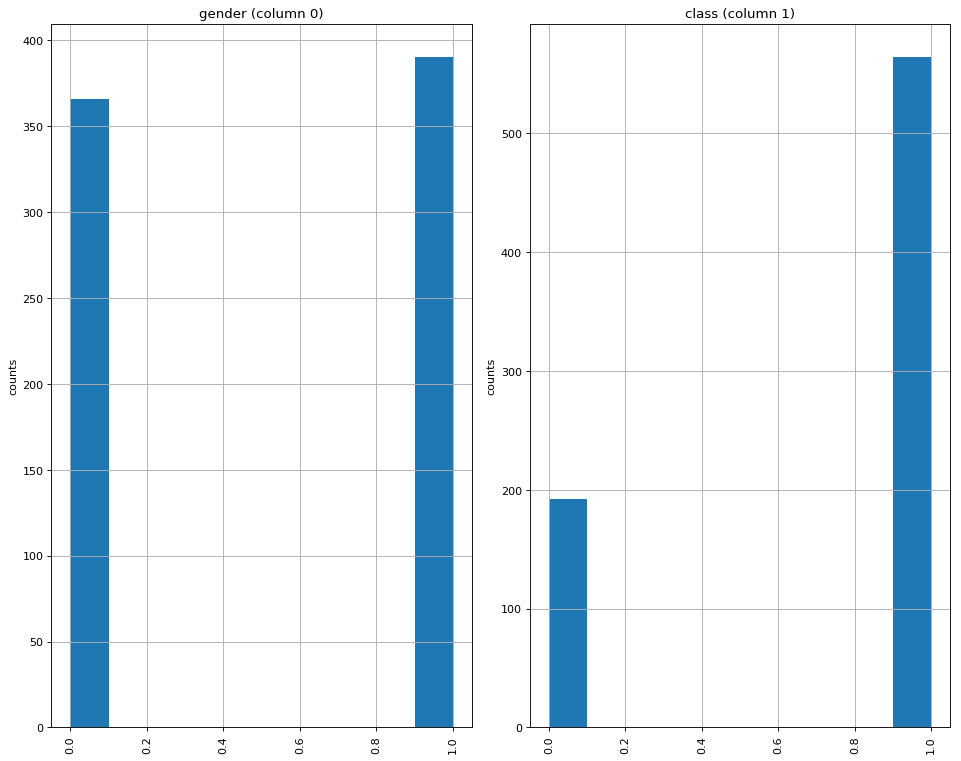

In [8]:
plotPerColumnDistribution(df1, 10, 5)

Correlation matrix:

In [9]:
plotCorrelationMatrix(df1, 188)

Scatter and density plots:

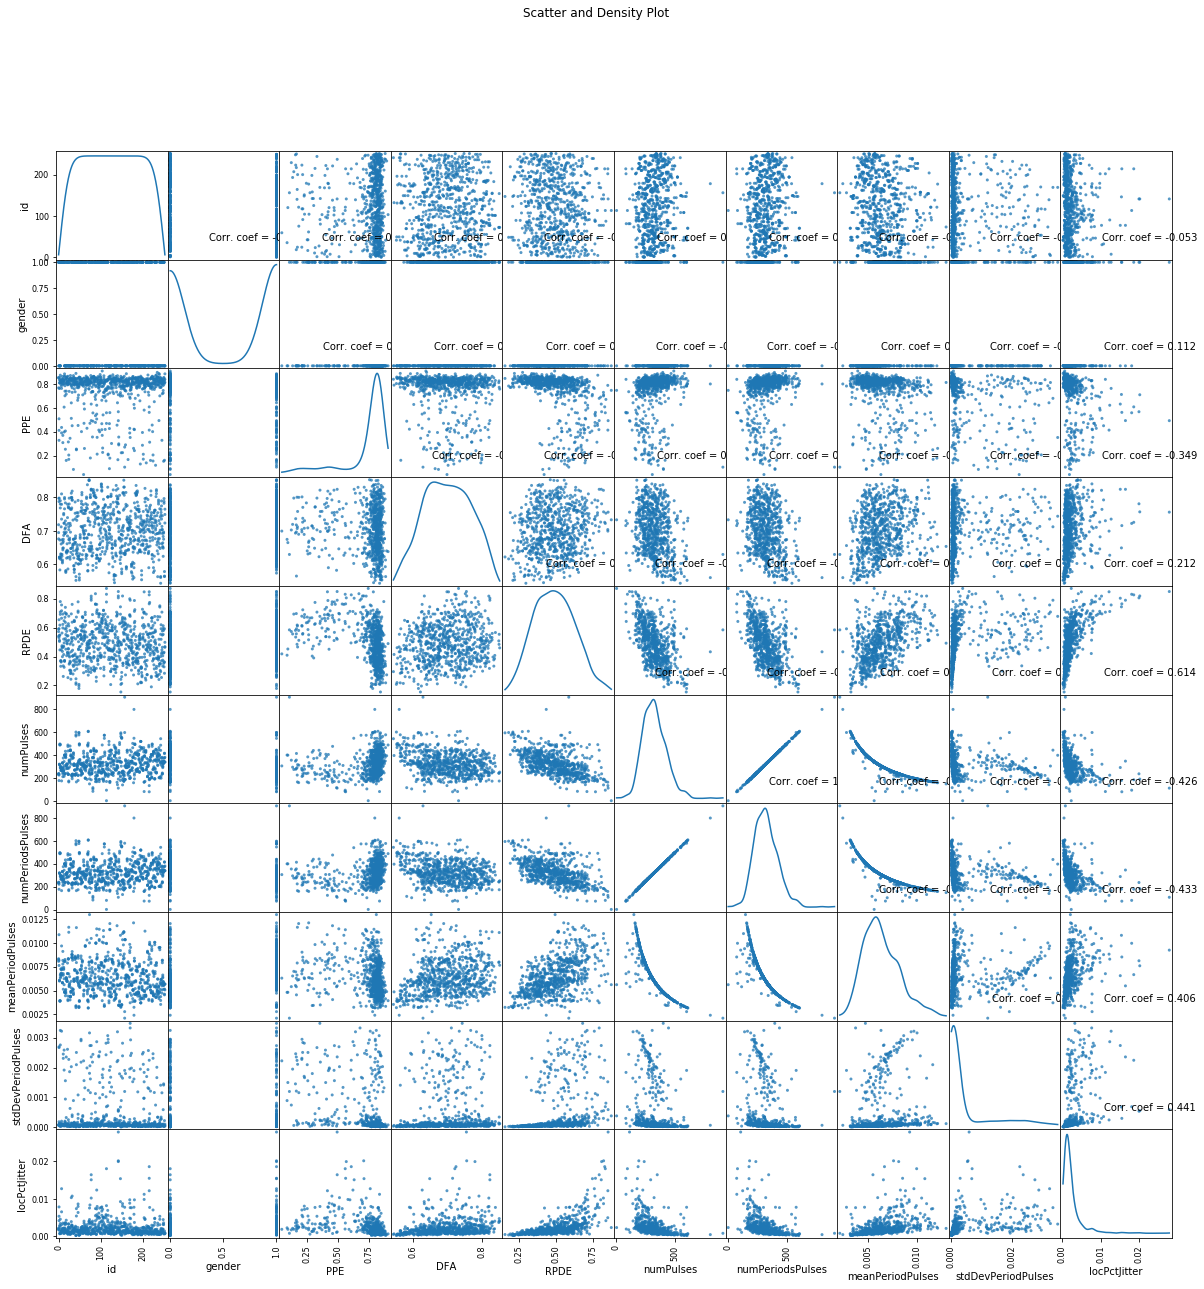

In [10]:
plotScatterMatrix(df1, 20, 10)

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: float64(749), int64(6)
memory usage: 4.4 MB


In [12]:
df1.iloc[0:10,-1]

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: class, dtype: int64

In [13]:
df1.columns

Index(['id', 'gender', 'PPE', 'DFA', 'RPDE', 'numPulses', 'numPeriodsPulses',
       'meanPeriodPulses', 'stdDevPeriodPulses', 'locPctJitter',
       ...
       'tqwt_kurtosisValue_dec_28', 'tqwt_kurtosisValue_dec_29',
       'tqwt_kurtosisValue_dec_30', 'tqwt_kurtosisValue_dec_31',
       'tqwt_kurtosisValue_dec_32', 'tqwt_kurtosisValue_dec_33',
       'tqwt_kurtosisValue_dec_34', 'tqwt_kurtosisValue_dec_35',
       'tqwt_kurtosisValue_dec_36', 'class'],
      dtype='object', length=755)

In [14]:
df1['class'].head()

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64

# Features and Label

In [15]:
X=df1.iloc[:,:-1]
y=df1.iloc[:,-1]

In [16]:
X.head()

id            ...              tqwt_kurtosisValue_dec_36
0   0            ...                                18.9405
1   0            ...                                45.1780
2   0            ...                                 4.7666
3   1            ...                                 4.0603
4   1            ...                                 6.1164

[5 rows x 754 columns]

In [17]:
X.iloc[:,2:].head()

PPE            ...              tqwt_kurtosisValue_dec_36
0  0.85247            ...                                18.9405
1  0.76686            ...                                45.1780
2  0.85083            ...                                 4.7666
3  0.41121            ...                                 4.0603
4  0.32790            ...                                 6.1164

[5 rows x 752 columns]

**Normalize the Input features X** 

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X.iloc[:,2:]=scaler.fit_transform(X.iloc[:,2:])

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [19]:
X.head()

id            ...              tqwt_kurtosisValue_dec_36
0   0            ...                               0.107598
1   0            ...                               0.277905
2   0            ...                               0.015595
3   1            ...                               0.011011
4   1            ...                               0.024357

[5 rows x 754 columns]

# Feature Importance and Selection

Chi-Square Test for Feature Selection:
A chi-square test is used in statistics to test the independence of two events. Given the data of two variables, we can get observed count O and expected count E.
In feature selection, we aim to select the features which are highly dependent on the response.

In [20]:
from sklearn.feature_selection import SelectKBest,chi2
bestfeatures = SelectKBest(score_func=chi2, k=7)
fit = bestfeatures.fit(X,y)

In [21]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [22]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  
print(featureScores.nlargest(150,'Score'))

                         Feature       Score
0                             id  397.462037
743    tqwt_kurtosisValue_dec_26   30.911696
744    tqwt_kurtosisValue_dec_27   25.009273
368  tqwt_entropy_shannon_dec_11   20.991448
333           tqwt_energy_dec_12   19.638662
373  tqwt_entropy_shannon_dec_16   19.357413
584         tqwt_stdValue_dec_11   17.729363
372  tqwt_entropy_shannon_dec_15   17.064740
745    tqwt_kurtosisValue_dec_28   16.638407
477         tqwt_TKEO_std_dec_12   15.890207
753    tqwt_kurtosisValue_dec_36   15.442829
440        tqwt_TKEO_mean_dec_11   15.407581
476         tqwt_TKEO_std_dec_11   15.338395
370  tqwt_entropy_shannon_dec_13   14.817812
371  tqwt_entropy_shannon_dec_14   14.594928
585         tqwt_stdValue_dec_12   14.435020
334           tqwt_energy_dec_13   14.432312
657         tqwt_maxValue_dec_12   14.337267
656         tqwt_maxValue_dec_11   13.923499
742    tqwt_kurtosisValue_dec_25   13.823581
369  tqwt_entropy_shannon_dec_12   13.247041
445       

In [23]:
selected_features=featureScores.nlargest(150,'Score')['Feature']

In [24]:
X[selected_features].head()

id            ...             tqwt_kurtosisValue_dec_6
0   0            ...                             0.000782
1   0            ...                             0.165225
2   0            ...                             0.000999
3   1            ...                             0.012545
4   1            ...                             0.001072

[5 rows x 150 columns]

# Correlation

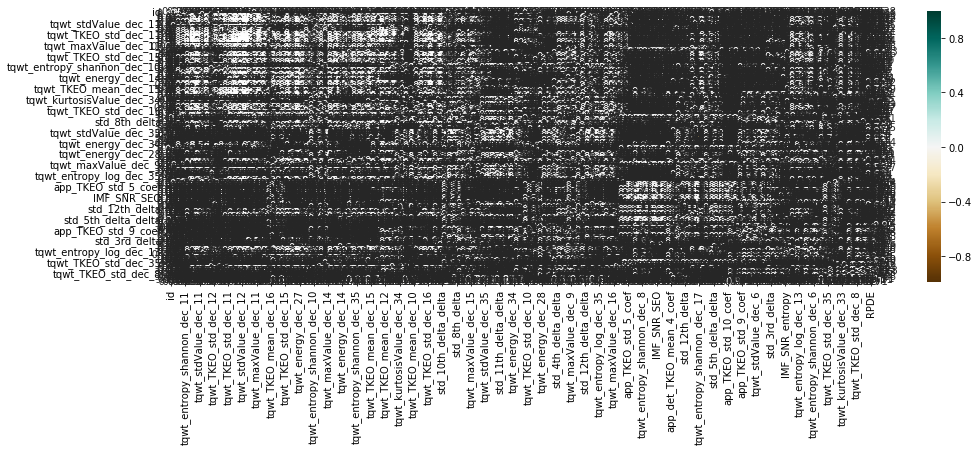

In [25]:
import seaborn as sb
plt.figure(figsize = (16,5))

#ax = sb.heatmap(df1.iloc[:, 1:6:], annot=True, linewidths=.5)
corr = X[selected_features].corr()
ax= sb.heatmap(corr, cmap="BrBG",annot=True, linewidths=.5)

# Train Test Split

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.33, random_state=42)

# Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

clf1 = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred1=clf1.predict(X_test)

accuracy_score(y_test, y_pred1)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.84

# SGD (Linear) Classifier

In [28]:
from sklearn.linear_model import SGDClassifier

clf2 = SGDClassifier(loss="hinge", penalty="l2").fit(X_train, y_train)

y_pred2=clf2.predict(X_test)

accuracy_score(y_test, y_pred2)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.34

# K Nearest Neighbors Classifier

In [29]:
from sklearn.neighbors import KNeighborsClassifier

clf3 = KNeighborsClassifier(n_neighbors=7).fit(X_train, y_train)

y_pred3=clf3.predict(X_test)

accuracy_score(y_test, y_pred3)

0.8

# Decision Tree Classifier

In [30]:
from sklearn.tree import DecisionTreeClassifier

clf4 = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)

y_pred4=clf4.predict(X_test)

accuracy_score(y_test, y_pred4)

0.804

# Random Forest Classifier

In [31]:
from sklearn.ensemble import RandomForestClassifier

clf5 = RandomForestClassifier(max_depth=2, random_state=0).fit(X_train, y_train)

y_pred5=clf5.predict(X_test)

accuracy_score(y_test, y_pred5)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.816

# Support Vector Machine Classifier

In [32]:
from sklearn.svm import SVC

clf6 = SVC(gamma='auto').fit(X_train, y_train)

y_pred6=clf6.predict(X_test)

accuracy_score(y_test, y_pred6)

0.724

# Models Comparison

In [33]:
from sklearn.metrics import f1_score,recall_score,precision_score

comp=pd.DataFrame({'Models':['Logistic Regression','SGD CLassifier', 
                             'K Nearest Neighbor','Decision Tree Regressor',
                             'Random Forest Regressor','Support Vector Machine'],
                   
                   'Accuracy ':[accuracy_score(y_test, y_pred1)*100,
                                accuracy_score(y_test, y_pred2)*100,
                               accuracy_score(y_test, y_pred3)*100,
                               accuracy_score(y_test, y_pred4)*100,
                               accuracy_score(y_test, y_pred5)*100,
                               accuracy_score(y_test, y_pred6)*100
                                 ],
                   'F1 Score':[f1_score(y_test, y_pred1),
                                 f1_score(y_test, y_pred2),
                                 f1_score(y_test, y_pred3),
                                 f1_score(y_test, y_pred4),
                                 f1_score(y_test, y_pred5),
                                 f1_score(y_test, y_pred6)
                                  ],
                  'Recall':[recall_score(y_test, y_pred1),
                                 recall_score(y_test, y_pred2),
                                 recall_score(y_test, y_pred3),
                                 recall_score(y_test, y_pred4),
                                 recall_score(y_test, y_pred5),
                                 recall_score(y_test, y_pred6)
                                  ],
                  'Precision':[precision_score(y_test, y_pred1),
                                 precision_score(y_test, y_pred2),
                                 precision_score(y_test, y_pred3),
                                 precision_score(y_test, y_pred4),
                                 precision_score(y_test, y_pred5),
                                 precision_score(y_test, y_pred6)
                                  ]} )

In [34]:
comp

Models  Accuracy   F1 Score    Recall  Precision
0      Logistic Regression       84.0  0.898477  0.977901   0.830986
1           SGD CLassifier       34.0  0.170854  0.093923   0.944444
2       K Nearest Neighbor       80.0  0.875000  0.966851   0.799087
3  Decision Tree Regressor       80.4  0.866485  0.878453   0.854839
4  Random Forest Regressor       81.6  0.884422  0.972376   0.811060
5   Support Vector Machine       72.4  0.839907  1.000000   0.724000

From the model comparison we can say that Logistic Regression performs the best among all the models.
Recall=1 means only one class among the two classes is getting predicted (which is not good) so we don't consider those models